In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
%cd '/content/drive/MyDrive/ML-DL/CodeGym'
!ls

/content/drive/MyDrive/ML-DL/CodeGym
house_price_Dống-Da_Hà-Nội_subdata.csv	Untitled0.ipynb  Untitled2.ipynb
OnlineRetail.csv			Untitled1.ipynb  Untitled3.ipynb


In [ ]:
df = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv', encoding="latin1")
df.head(3)

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [ ]:
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [ ]:
df.isnull().sum()

area                   6
price                 54
postDate               0
land_certificate     302
house_direction      629
balcony_direction    647
toilet               431
bedroom              351
floor                305
lat                    0
long                   0
property_type          0
dtype: int64

In [ ]:
df['land_certificate'] = df['land_certificate'].fillna("no information")

In [ ]:
df['area'].value_counts()

0.0      41
35.0     34
45.0     33
55.0     31
50.0     27
         ..
365.0     1
78.8      1
158.0     1
22.0      1
107.0     1
Name: area, Length: 127, dtype: int64

In [ ]:
df['area'] = df['area'].fillna(0.0)

In [ ]:
df['house_direction'].value_counts()

dong-Nam    17
Tay-Nam      8
Tay-Bac      6
dong-Bac     4
Nam          3
dong         3
Bac          1
Name: house_direction, dtype: int64

In [ ]:
df['house_direction'] = df['house_direction'].fillna('dong-Nam')

In [ ]:
df['balcony_direction'].value_counts()

dong-Nam    11
Tay-Nam      4
Tay-Bac      3
Nam          2
dong         2
Bac          1
dong-Bac     1
Name: balcony_direction, dtype: int64

In [ ]:
df['balcony_direction'] = df['balcony_direction'].fillna('dong-Nam')

In [ ]:
df['toilet'].value_counts()

4.0     65
1.0     55
3.0     37
2.0     23
5.0     21
6.0     15
7.0     10
8.0      7
10.0     2
12.0     2
11.0     2
16.0     1
Name: toilet, dtype: int64

In [ ]:
df['toilet'] = df['toilet'].fillna(4.0)

In [ ]:
df['bedroom'].value_counts()

3.0     75
4.0     56
6.0     49
2.0     46
5.0     29
1.0     25
8.0     14
10.0    10
7.0      6
9.0      3
14.0     2
12.0     2
11.0     2
22.0     1
Name: bedroom, dtype: int64

In [ ]:
df['bedroom'] = df['bedroom'].fillna(3.0)

In [ ]:
df['floor'].value_counts()

5.0     121
4.0      97
6.0      33
3.0      29
7.0      28
2.0      19
8.0      18
1.0      13
9.0       7
11.0      1
Name: floor, dtype: int64

In [ ]:
df['floor'] = df['floor'].fillna(5.0)

In [ ]:
df.isnull().sum()

area                  0
price                54
postDate              0
land_certificate      0
house_direction       0
balcony_direction     0
toilet                0
bedroom               0
floor                 0
lat                   0
long                  0
property_type         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df1 = df[(df['area'] > 0)]

In [ ]:
df1.isnull().sum()

area                 0
price                0
postDate             0
land_certificate     0
house_direction      0
balcony_direction    0
toilet               0
bedroom              0
floor                0
lat                  0
long                 0
property_type        0
dtype: int64

In [ ]:
df_trong_ngo = df1[(df1['property_type'] == 'trong ngo')]
df_trong_ngo.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo


In [ ]:
df_trong_ngo['P/A'] = df_trong_ngo['price'] / df_trong_ngo['area']
df_trong_ngo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,P/A
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000


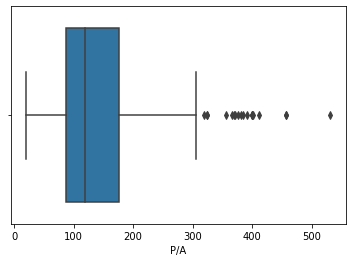

In [ ]:
sns.boxplot(x=df_trong_ngo['P/A'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


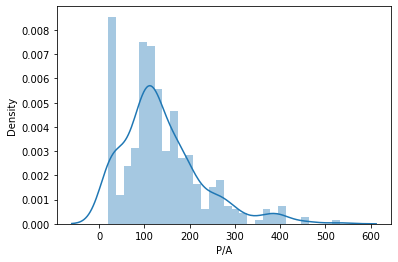

In [ ]:
sns.distplot(df_trong_ngo['P/A'], bins=30)

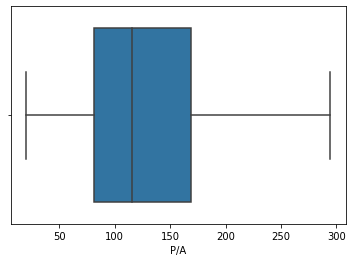

In [ ]:
df_trong_ngo_1 = df_trong_ngo[(df_trong_ngo['P/A'] < 300)]
sns.boxplot(x=df_trong_ngo_1['P/A'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


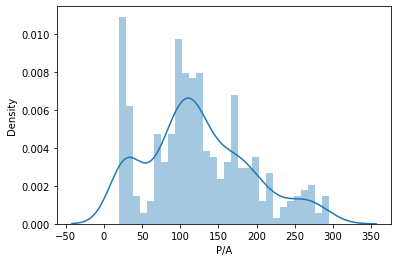

In [ ]:
sns.distplot(df_trong_ngo_1['P/A'], bins=30)